In [1]:
import matplotlib.pyplot as plt
from utils import find_orf, translate

In [2]:
seq = 'GAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAACAGCCACCATGGTGTTCACCCTGGAGGACTTCGTCGGGGACTGGCGCCAGACGGCTGGCTACAACCTGGACCAGGTCCTGGAACAGGGCGGAGTGTCGTCTCTCTTCCAGAACCTGGGCGTTAGTGTGACTCCCATCCAGCGCATCGTGCTGAGCGGGGAGAATGGGCTGAAGATTGACATCCACGTCATCATACCTTACGAGGGCCTCAGCGGAGACCAGATGGGCCAAATTGAGAAGATCTTCAAGGTGGTGTACCCAGTGGATGACCACCACTTTAAAGTAATCCTGCATTACGGCACACTAGTGATTGATGGTGTGACTCCGAATATGATCGATTACTTCGGTAGGCCCTATGAGGGCATCGCCGTGTTCGACGGCAAGAAGATCACCGTAACCGGCACCCTTTGGAACGGCAACAAGATCATCGACGAGCGTCTCATTAACCCTGACGGCTCCCTGCTGTTTCGCGTGACCATCAACGGTGTCACCGGTTGGCGCCTGTGCGAGCGGATTTTGGCCTGATAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGC '

In [5]:
#map all possible stops
def map_stop_opportunities(aa_seq):
    from utils import translate
    stopdipeps = ['LI','LM','LK','LT','LS','LR','LV','LE','LA','LT','LG',
              'II','IM','IK','IT','IS','IR','IV','IE','IA','IT','IG',
              'VI','VM','VK','VT','VS','VR','VV','VE','VA','VT','VG']
    seqdipeps = [aa_seq[n:n+2] for n in range(len(aa_seq)-1)]
    [p for p,v in enumerate(seqdipeps) if v in stopdipeps]
    return [idx for idx,val in enumerate(seqdipeps) if val in stopdipeps]

In [19]:
orf_coords = find_orf(seq)
orf = seq[orf_coords[0]:orf_coords[1]]
plus_one_orf = seq[orf_coords[0]+1:orf_coords[1]-2]
plus_one_codons = [plus_one_orf[n:n+3] for n in range(0,len(plus_one_orf),3)]
plus_one_stops = [idx for idx,val in enumerate(plus_one_codons) if val in ['TAA','TAG']]
plus_one_stops_nt = [(x*3+1)+orf_coords[0] for x in plus_one_stops]
plus_one_opps = map_stop_opportunities(translate(orf))
plus_one_opps_nt = [(x*3+1)+orf_coords[0] for x in plus_one_opps]

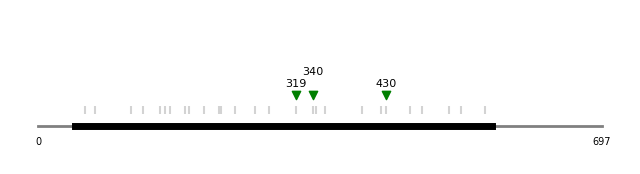

In [30]:
y1 = [1.4 for x in plus_one_stops]
y2 = [1.2 for x in plus_one_opps]
fig,ax = plt.subplots(figsize=(8,2))
ax.scatter(plus_one_stops_nt,y1,c='green',marker='v')
ax.scatter(plus_one_opps_nt,y2,c='lightgrey',marker='|')
texty=1.5
if len(plus_one_stops)==0:
    ax.text(len(seq)/2,1.5,'No +1 stops detecteed.',color='red',
             fontweight='bold',horizontalalignment='center')
else:
    for idx,site in enumerate(plus_one_stops_nt):
        if idx > 0:
            if ((site-plus_one_stops_nt[idx-1])<0.1*len(seq)) and (texty<2.2):
                texty+=0.15
            else:
                texty=1.5
        ax.text(site,texty,plus_one_stops_nt[idx],horizontalalignment='center',fontsize=8)
ax.plot((0, len(seq)),(1,1),linewidth=2,color='grey')
ax.plot(find_orf(seq),(1,1),linewidth=5,color='black')
ax.text(0,0.75,'0',horizontalalignment='center',fontsize=7)
ax.text(len(seq),0.75,str(len(seq)),horizontalalignment='center',fontsize=7)
ax.set_ylim((0.5,2.5))
ax.axis('off')
plt.show()

In [31]:
plus_one_stops_nt

[319, 340, 430]

In [34]:
seq[430:433]

'TAA'

In [97]:
?translate

Signature: translate(dnaSeq, genCode=1)
Docstring:
Returns an amino acid sequence translated for an input DNA 
sequence.

Parameters
seq : str
    The DNA sequence to be translated.
genCode : int
    The genetic code to be used. The standard genetic code is 1, variant 
    codes follow the numbering system used at 
    www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=cgencodes.

Returns
str
    The amino acid sequence translated from seq.
File:      ~/lintYR/Dash tests/src/utils.py
Type:      function